In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import sys
import plotly.figure_factory as ff
import plotly.express as px
sys.tracebacklimit = 0 # turn off the error tracebacks

In [2]:
# Problem 1 - Get user agent and make headers dictionary
r = requests.get('https://httpbin.org/user-agent')
useragent = json.loads(r.text)['user-agent']
headers = {'User-Agent': useragent,
           'from': 'vrd9sd@virginia.edu'}

url = 'https://runningintheusa.com/classic/list/within-200-miles-of-virginia%20beach-va/upcoming/half-marathon/miles-between-250/page-2'
r = requests.get(url, headers=headers)
# Parsing HTML code 
mysoup = BeautifulSoup(r.text, 'html.parser')

#distance = [x.div for i, x in enumerate(mysoup.find_all('td', attrs={'rowspan': '1'})) if i >20]


In [3]:
#days = [x.div for x in mysoup.find_all('div', attrs={'style':'text-decoration:inherit;',
                                                    #'rowspan': '1'})]
#days = [item[item.find('padding-left:10px">') + len('padding-left:10px">'):item.find('</div>', item.find('padding-left:10px">'))]
        #for item in days if 'padding-left:10px' in item]


In [5]:
def race_df(url):
    r =    r = requests.get(url, headers=headers)
    mysoup = BeautifulSoup(r.text, 'html.parser')
 

    titles = [x.b for x in mysoup.find_all('td', attrs = {'style': 'text-decoration:inherit;'})]
    titles = [x.string for i, x in enumerate(titles) if i%2==1 and i > 2]

    rowspan_1_2_cities = [x.b for x in mysoup.find_all('td', attrs={'rowspan':['1', '2']})]
    cities = rowspan_1_2_cities[2:]
    cities = [x.string for i,x in enumerate(cities) if i%4==0 and i >0]

    dates = [x.string for x in mysoup.find_all('div', attrs = {'style':"font-weight:bold"})]
    dates = [x for i,x in enumerate(dates) if i>1 and i<= (len(cities) + 1)]
    
    print(len(dates), len(titles), len(cities))
    
    races = pd.DataFrame({
    #'days': days,
    'dates' : dates,
    'races': titles,
    'cities': cities })
    return races

url = 'https://runningintheusa.com/classic/list/within-200-miles-of-virginia%20beach-va/upcoming/half-marathon/miles-between-250/page-4'
new_df = pd.DataFrame()
for i in range(2, 7):
    # Insert new number into url str for pages 1-
    url = 'https://runningintheusa.com/classic/list/within-200-miles-of-virginia%20beach-va/upcoming/half-marathon/miles-between-250/page-2'
    url = url[:-1] + str(i)
    new_df = pd.concat([new_df, race_df(url)], ignore_index=True) 

23 23 23
23 23 23
23 23 23
23 23 23
23 23 23


### Problem 0 
* A: Convert the race dates to datetime objects
 
* B: Add a day of the week column for races

* C: Order the Columns in Race DF to be aesthetically pleasing

* D: Save the race data to a csv

In [7]:
new_df['dates'] = pd.to_datetime(new_df.dates) # Part A
new_df['day'] = new_df['dates'].dt.day_name() # Part B
new_df = new_df[['day', 'dates', 'races', 'cities']] # Part C
csv_file_path = 'half_marathon_data.csv'
new_df.to_csv(csv_file_path, index=False) # Part D

### Problem 1
* A: Show how many races featuring a half marathon each city within 200 miles of va beach has on pages 2 to 6 of running the USA

* B: Make a table of all the races

* C: Show how many races occur on each date

In [11]:
# Problem A
city_race_count = new_df.groupby(['cities']).agg({'races':'count'}).sort_values(by='races', ascending=False)   
city_race_count = city_race_count.reset_index(drop=False).rename({'cities': 'city'}, axis=1)

In [12]:
city_race_count.head()

,city,races
0,"Washington, DC",10
1,"Bel Air, MD",6
2,"Raleigh, NC",5
3,"Rocky Mount, NC",5
4,"Westminster, MD",5


In [21]:
# Problem B
table=ff.create_table(new_df)

In [23]:
# Problem C
date_race_count = new_df.groupby('dates').agg({'races':'count'})
date_race_count = date_race_count.reset_index()
date_race_count.head()

,dates,races
0,2024-09-07,20
1,2024-09-14,10
2,2024-09-28,1
3,2024-09-29,1
4,2024-10-05,6


## Problem 2 
* A: Create a table of months of year, counts of races and day

* B: Create an interactive barplot that shows the counts of half-marathons by day as well as month they occur in

* C: Identify the races that dont occur on saturdays and sundays

In [26]:
date_df = new_df.copy(deep=True) # dont modify workingdataframe 
date_df['month'] = date_df['dates'].dt.month
date_count = date_df.groupby(['day', 'month'])['races'].count().reset_index()# part A)
date_count.head()

,day,month,races
0,Monday,11,1
1,Saturday,1,3
2,Saturday,2,2
3,Saturday,3,2
4,Saturday,4,2


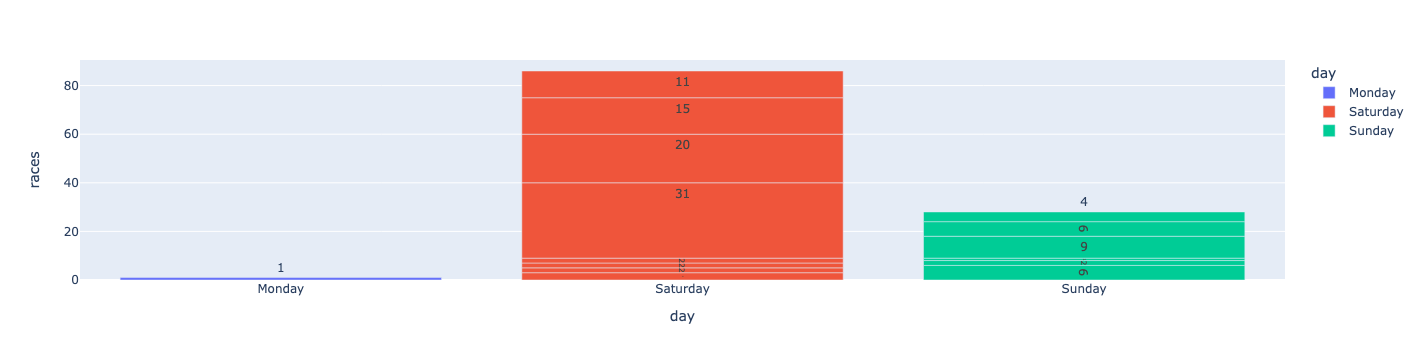

In [40]:
# Part B show Races by day of week 
fig = px.bar(date_count, x='day', y='races', color='day',
             labels = 'month',
            text='races')

fig.show()

In [30]:
# Part C problem
new_df.query("day != 'Saturday' & day!= 'Sunday'")

,day,dates,races,cities
60,Monday,2024-11-11,Run for the Wounded Race,"Triangle, VA"
